# Breast Cancer Prediction System
This is my project where I will make a Logistic Regression model, train it data of sckit breast cancer dataset and then the model could predict if a tumor is manignant or benign.
**This is not complete yet**

Lets start by importing the Packages we gonna use

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd

Now loading the dataset

In [111]:

df = pd.DataFrame({
    "mean radius": [12, 15, 46, 60],
    "mean area": [13, 24, 54, 70],
    "target": [1, 1, 0, 0]
})
X = np.column_stack((np.array(df['mean radius']), np.array(df['mean area'])))
y = np.array(df.target)

# Z-score normalization
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


Okay now lets make our logistic regression model

In [112]:
def sigmoid(x, w, b):
    z = np.dot(x, w) + b
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

Now Cost function

In [113]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += (sigmoid(X[i], w, b) - y[i]) ** 2

    return cost / (2 * m)

Now lets take care of gradient descent

In [114]:
def gradient_descent(X, y, initial_w, initial_b, alpha, iterations):
    # First lets calculate dj_dw and dj_db
    m = X.shape[0]
    n = X.shape[1]

    w, b = initial_w, initial_b

    for iteration in range(iterations):
        dj_dw = np.zeros(n)
        dj_db = 0

        for i in range(m):
            cost = sigmoid(X[i], w, b) - y[i]

            dj_dw += cost * X[i]
            dj_db += cost

        dj_dw, dj_db = dj_dw / m, dj_db / m

        w -= alpha * dj_dw
        b -= alpha * dj_db

    return w, b

Wohooo! Gradient descent is implemented, now lets visualize stuff

In [115]:
# Training the model
w, b = gradient_descent(X_normalized, y, np.zeros(X.shape[1]), 0, 1e-5, 10000)
print(w, b)

[-0.04725747 -0.04650461] -5.980298492745063e-08


In [116]:
m = X.shape[0]
y_hat = np.zeros(m)

for i in range(m):
    y_hat[i] = sigmoid(X_normalized[i], w, b)
y_pred = (y_hat >= 0.5).astype(int)

[12 15 46 60] [1 1 0 0]


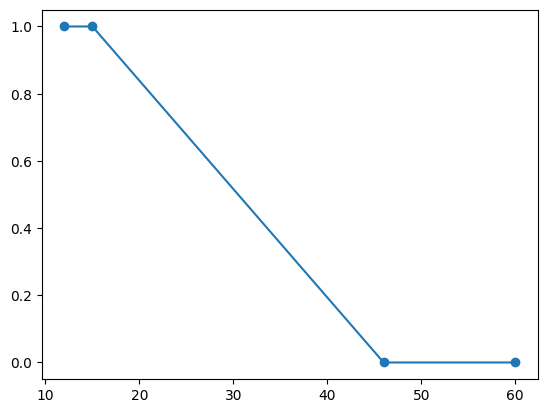

In [117]:
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_pred)
print(X[:, 0], y)